## 1. Importar las librerías necesarias

Importamos las librerías principales como *pandas* para el manejo de datos, *matplotlib* y *seaborn* para las visualizaciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

## 2. Cargar los datasets

Se cargan los datasets books.csv (libros), ratings.csv (calificaciones de los usuarios) y to_read.csv (libros que los usuarios marcan para leer).

In [2]:
df_books = pd.read_csv("dataset/books.csv")
df_ratings = pd.read_csv("dataset/ratings.csv")
df_to_read = pd.read_csv("dataset/to_read.csv")
tags_df = pd.read_csv("dataset/tags.csv")
book_tags_df = pd.read_csv("dataset/book_tags.csv")

## 3. Explorar la Información de los Datasets

Esta celda muestra la estructura de cada dataset, el número de columnas y si hay valores faltantes o problemas con los tipos de datos.

### Información del dataset de libros:

In [3]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Información sobre el dataset de ratings:

In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


### Información sobre el dataset 'to_read':

In [5]:
df_to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


### Información sobre el dataset de tags

In [6]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


### Información sobre el dataset de book_tags

In [7]:
book_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


## 4. Limpieza de los Datos

### Book Dataset
Se eliminan columnas que no son útiles para el sistema de recomendación y nuestra página. Se eliminan las filas que tienen valores nulos en original_publication_year porque no podemos determinar el año de publicación de esos libros y eso puede afectar a nuestro análisis. Se imputan valores faltantes en la columna language_code con la etiqueta "Other".

In [8]:
# Nos quedamos con las columnas que nos interesan
df_books = df_books.drop(['id','best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'original_title', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'], axis=1)

# Eliminamos los libros duplicados y cuyos valores de 'original_publication_year' sean nulos
df_books.drop_duplicates(subset='title', keep='first', inplace=True)
df_books.dropna(subset='original_publication_year',inplace=True)

# Rellenamos los valores nulos de 'language_code' con 'Other'
df_books.fillna({'language_code':'Other'}, inplace=True)

# Visualizamos los primeros libros
df_books.sort_values('book_id', ascending=True).head(10)


,book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,image_url,small_image_url
26,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
20,2,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix (Har...,eng,4.46,1735368,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
1,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
17,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban (Harr...,eng,4.53,1832823,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
23,6,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire (Harry Pot...,eng,4.53,1753043,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
3274,8,"J.K. Rowling, Mary GrandPré",2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3752,10,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",eng,4.73,24618,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
53,11,Douglas Adams,1979.0,The Hitchhiker's Guide to the Galaxy (Hitchhik...,en-US,4.20,936782,https://images.gr-assets.com/books/1327656754m...,https://images.gr-assets.com/books/1327656754s...
336,13,Douglas Adams,1996.0,The Ultimate Hitchhiker's Guide to the Galaxy,eng,4.37,222842,https://images.gr-assets.com/books/1404613595m...,https://images.gr-assets.com/books/1404613595s...
373,21,Bill Bryson,2003.0,A Short History of Nearly Everything,en-US,4.19,191535,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


### Rating Dataset
Se eliminan las valoraciones de usuarios a libros duplicadas. Se eliminan las valoraciones de los libros que tras la limpieza de df_books no se encuentran en este.

In [9]:
# Eliminamos los ratings duplicados
df_ratings.drop_duplicates(subset = ['user_id','book_id'], keep = False, inplace= True)
print(df_ratings.shape)

# Eliminamos los ratings cuyos libros no estén en el dataset de libros
df_ratings = df_ratings[df_ratings['book_id'].isin(df_books['book_id'])]
print(df_ratings.shape)

# Visualizamos los primeros ratings
df_ratings.head()

(977269, 3)
(78891, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


### To Read Dataset
Se eliminan los duplicados entre los pares user_id y book_id. Se eliminan los libros en to_read que tras la limpieza de df_books no están disponibles

In [10]:
# Eliminamos los to read duplicados
df_to_read.drop_duplicates(subset = ['user_id','book_id'], keep = False, inplace= True)

# Eliminamos los libros en to read cuyos libros no estén en el dataset de libros
df_to_read = df_to_read[df_to_read['book_id'].isin(df_books['book_id'])]

# Visualizamos los primeros libros en to read
df_to_read.head()


,user_id,book_id
0,1,112
8,2,11
9,2,13
12,2,106
23,2,1371


### Tags Dataset
Eliminamos los tags duplicados del dataset de tags para su posterior unión con el DataFrame que asocia books con tags.

In [11]:
# Eliminamos los tags duplicados
tags_df = tags_df.drop_duplicates(subset='tag_id', keep='first')

# Visualizamos los primeros tags
tags_df.head()


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


### Book-Tags Dataset
Realizamos ciertas transformaciones (Renombrar columnas, eliminar libros no usados, tags no identificados...) del DataFrame para poder unirlo sin problema al otro DataFrame de tags y así relacionar el nombre de las etiquetas con los libros. 

In [12]:
# Renombramos la columna goodreads_book_id a book_id para mayor claridad
book_tags_df = book_tags_df.rename(columns={'goodreads_book_id': 'book_id'})

# Eliminamos la columna count
book_tags_df = book_tags_df.drop(['count'], axis=1)

# Eliminamos aquellos tags asociados a libros que no estén en el dataset de libros
book_tags_df = book_tags_df[book_tags_df['book_id'].isin(df_books['book_id'])]

# Eliminamos aquellos tags que no estén en el dataset de tags
book_tags_df = book_tags_df[book_tags_df['tag_id'].isin(tags_df['tag_id'])]

# Eliminamos los tags duplicados
book_tags_df = book_tags_df.drop_duplicates(subset=['book_id', 'tag_id'], keep='first')
print(book_tags_df.head())
# Unimos los libros con tags con los nombres de los tags
join_tags = pd.merge(tags_df ,book_tags_df, left_on='tag_id', right_on='tag_id', how='left').drop(['tag_id'], axis=1)

# Visualizamos los primeros tags con sus nombres y sus asociaciones
join_tags.head()

   book_id  tag_id
0        1   30574
1        1   11305
2        1   11557
3        1    8717
4        1   33114


,tag_name,book_id
0,-,665.0
1,-,81176.0
2,-,147074.0
3,-,2983489.0
4,-,6713071.0


Buscamos y reunimos los géneros de libros en una lista. Filtramos todo nuestro DataFrame con tags y libros para quedarnos solo con aquellas etiquetas que hagan referencia a uno de esots géneros, para poder asociar a cualquier libro uno de estos.

In [13]:
# Lista de géneros
genres=["art", "biography", "business", "chick lit", "childrens", "christian", "classics",
        "comics", "contemporary", "cookbooks", "crime", "fantasy", "fiction", 
        "graphic novels", "historical fiction", "history", "horror", "humor and comedy",
        "manga", "memoir", "music", "mystery", "nonfiction", "paranormal", "philosophy",
        "poetry", "psychology", "religion", "romance", "science", "science fiction",
        "self help", "suspense", "spirituality", "sports", "thriller", "travel", "young adult"]

# Filtramos para quedarnos con los tags que sean géneros
tag_genres = join_tags[join_tags['tag_name'].isin(genres)].reset_index(drop=True)


# Visualizamos el DataFrame anterior pero solo con los géneros
tag_genres.head()


,tag_name,book_id
0,art,119.0
1,art,840.0
2,art,960.0
3,art,968.0
4,art,1319.0


Unimos los géneros a su libro correspondiente para su posterior almacenamiento y uso

In [14]:
# Crear un subconjunto de datos con solo algunas columnas
subset_books = df_books[['book_id', 'title', 'authors', 'average_rating', 'original_publication_year', 'ratings_count', 'small_image_url']]
subset_tags = tag_genres[['tag_name', 'book_id']]

# Combinar los tags en una sola fila por libro
subset_tags = subset_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()

# Combinar los datos de libros y tags
subset_books_profile = pd.merge(subset_books, subset_tags, on='book_id', how='inner')

## 5. Análisis Exploratorio de Datos (EDA)

In [15]:
# Función para obtener los géneros de un libro
def create_html(top_books):
  
  # Crear el HTML para visualizar los libros con imágenes y estilo
  html_content = '''
  <table style="border-collapse: collapse; width: 100%;">
    <thead>
      <tr>
        <th style="border: 1px solid #dddddd; padding: 8px;">Título</th>
        <th style="border: 1px solid #dddddd; padding: 8px;">Autor</th>
        <th style="border: 1px solid #dddddd; padding: 8px;">Valoración</th>
        <th style="border: 1px solid #dddddd; padding: 8px;">Imagen</th>
      </tr>
    </thead>
    <tbody>
  '''

  # Crear las filas con los datos del DataFrame
  for _, row in top_books.iterrows():
      html_content += f'''
      <tr>
        <td style="border: 1px solid #dddddd; padding: 8px;">{row['title']}</td>
        <td style="border: 1px solid #dddddd; padding: 8px;">{row['authors']}</td>
        <td style="border: 1px solid #dddddd; padding: 8px;">{row['average_rating']}</td>
        <td style="border: 1px solid #dddddd; padding: 8px;">
          <img src="{row['image_url']}" alt="Book image" style="width: 50px; height: 75px;">
        </td>
      </tr>
      '''

  # Cerrar la tabla
  html_content += '''
    </tbody>
  </table>
  '''

  # Mostrar el contenido HTML con estilo
  return html_content


### Mostrar libros con mejores valoraciones

In [16]:
# Obtener los 5 libros con mayor valoración
top_books = df_books.nlargest(5, 'average_rating')[['title', 'authors', 'average_rating', 'image_url']]

# Mostrar el contenido en HTML
HTML(create_html(top_books))

Título,Autor,Valoración,Imagen
The Complete Calvin and Hobbes,Bill Watterson,4.82,
"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","J.K. Rowling, Mary GrandPré",4.77,
ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76,
Mark of the Lion Trilogy,Francine Rivers,4.76,


### Mostrar libros más populares
Elegimos los libros más populares basándonos en los libros con más valoraciones

In [17]:
# Obtener los 5 libros con mayor número de valoraciones
popular_books = df_books.nlargest(5, 'ratings_count')[['title', 'authors', 'average_rating', 'image_url']]

# Mostrar el contenido en HTML
HTML(create_html(popular_books))

Título,Autor,Valoración,Imagen
"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","J.K. Rowling, Mary GrandPré",4.44,
"Twilight (Twilight, #1)",Stephenie Meyer,3.57,
To Kill a Mockingbird,Harper Lee,4.25,
The Great Gatsby,F. Scott Fitzgerald,3.89,


### Matriz de correlación del dataset de libros
Mediante esta podemos ver que características númericas influyen en la valoración de nuestros usuarios y asi poder centrarnos en esta a la hora de realizar nuestro sistema

In [18]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9943 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    9943 non-null   int64  
 1   authors                    9943 non-null   object 
 2   original_publication_year  9943 non-null   float64
 3   title                      9943 non-null   object 
 4   language_code              9943 non-null   object 
 5   average_rating             9943 non-null   float64
 6   ratings_count              9943 non-null   int64  
 7   image_url                  9943 non-null   object 
 8   small_image_url            9943 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 776.8+ KB


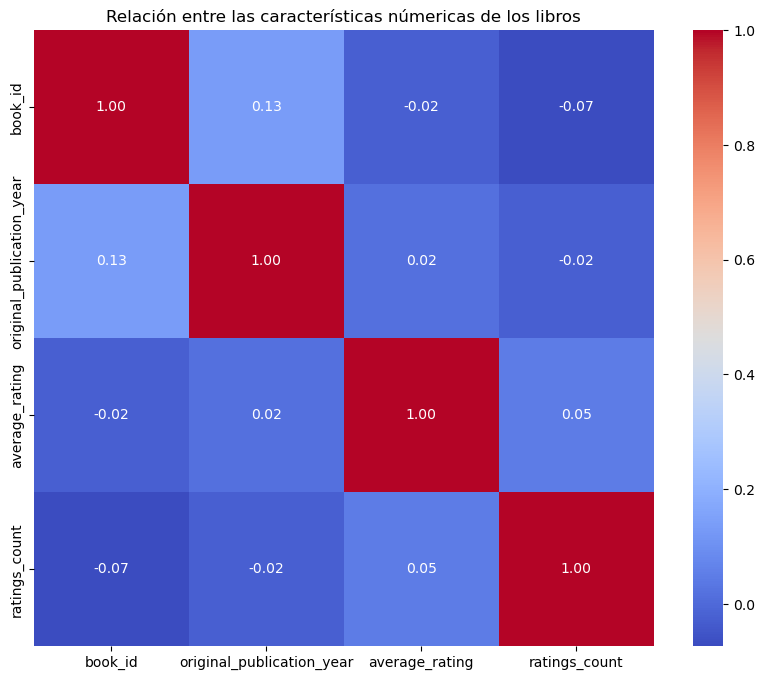

In [19]:
df = df_books.copy()
df = df.drop(['title', 'authors', 'language_code', 'image_url','small_image_url'], axis=1)


# Generar el gráfico de correlación entre las características de los libros
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Relación entre las características númericas de los libros')
plt.show()


### Autores con más libros

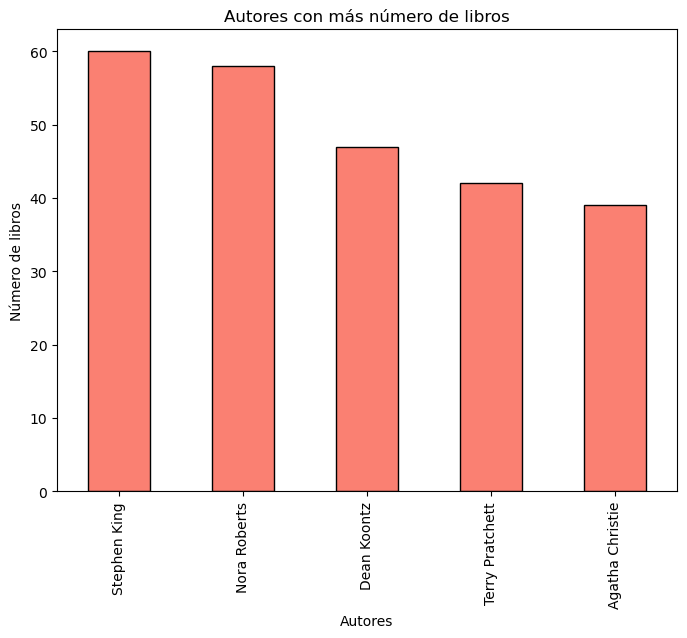

In [20]:
# Autores con más número de libros
books_autor = df_books['authors'].value_counts().head(5)

# Visualizamos los autores con más libros
plt.figure(figsize=(8,6))
books_autor.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Autores con más número de libros')
plt.xlabel('Autores')
plt.ylabel('Número de libros')
plt.show()

### Autores con mejores valoraciones

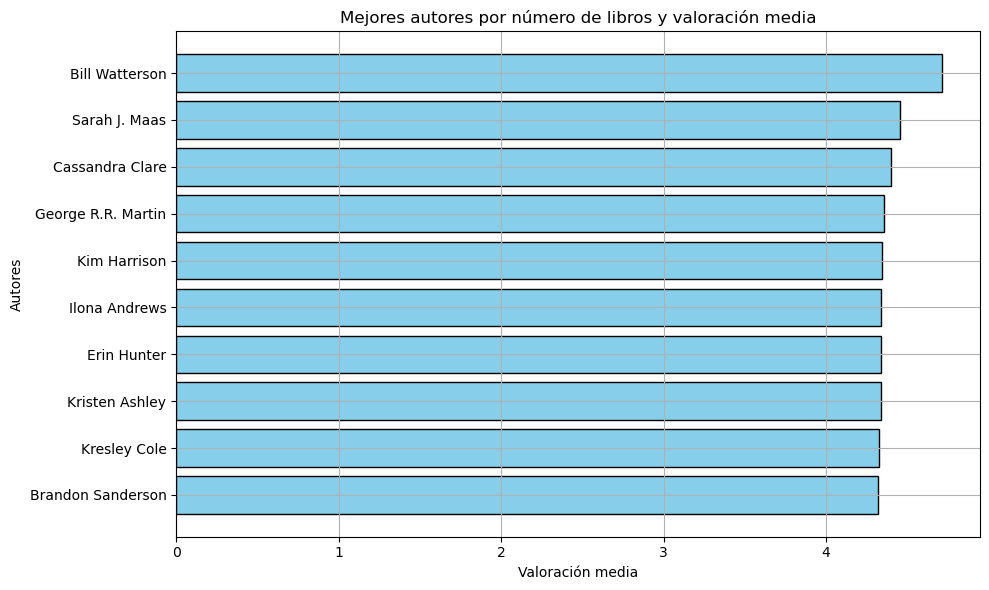

In [21]:

# Agrupar por autor y calcular el número de libros y la media de valoraciones
author_stats = df_books.groupby('authors').agg(
    num_books=('book_id', 'count'),
    avg_rating=('average_rating', 'mean')
).reset_index()

# Filtrar autores con al menos un número mínimo de libros (e.g., 3 libros)
min_books = 10
top_authors = author_stats[author_stats['num_books'] >= min_books]

# Ordenar por la media de valoraciones
top_authors = top_authors.sort_values(by='avg_rating', ascending=False).head(10)

# Graficar los autores con mejor nota media y al menos 3 libros
plt.figure(figsize=(10,6))
plt.barh(top_authors['authors'], top_authors['avg_rating'], color='skyblue', edgecolor='black')
plt.title('Mejores autores por número de libros y valoración media')
plt.xlabel('Valoración media')
plt.ylabel('Autores')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor esté arriba
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribución de la nota media

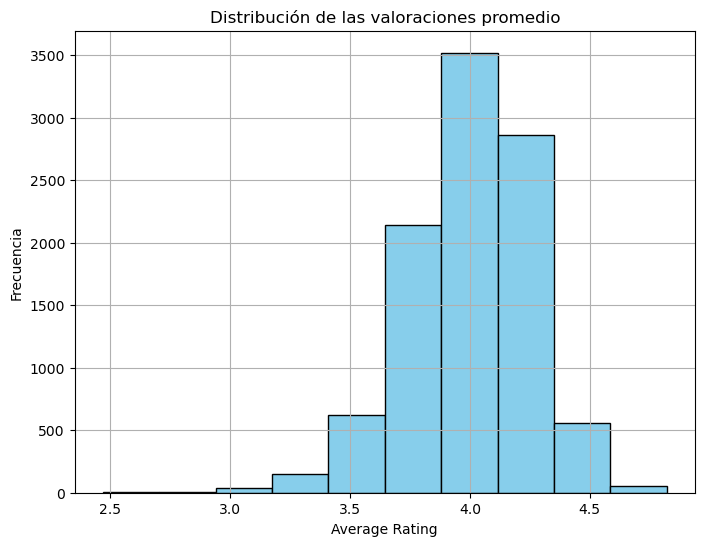

In [22]:
# Graficar la distribución de las valoraciones promedio
plt.figure(figsize=(8,6))
plt.hist(df_books['average_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de las valoraciones promedio')
plt.xlabel('Average Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Relación entre Número de valoraciones y valoración promedio

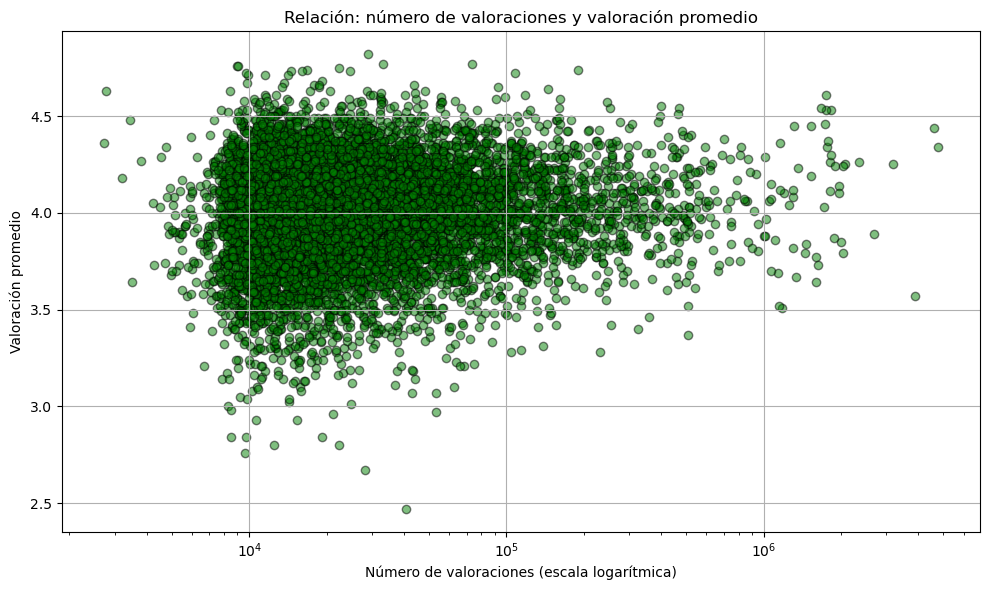

In [23]:
# Graficar la relación entre el número de valoraciones y la valoración promedio

plt.figure(figsize=(10,6))

# Graficar con escala logarítmica en el eje de valoraciones y transparencia en los puntos
plt.scatter(df_books['ratings_count'], df_books['average_rating'], color='green', alpha=0.5, edgecolor='black')

# Escala logarítmica en el eje X para mejor distribución de los datos
plt.xscale('log')

plt.title('Relación: número de valoraciones y valoración promedio')
plt.xlabel('Número de valoraciones (escala logarítmica)')
plt.ylabel('Valoración promedio')

plt.grid(True)
plt.tight_layout()
plt.show()

### Géneros con más libros

In [24]:
# Contar el número de libros por género
tag_genres_count = tag_genres.groupby('tag_name').count()
tag_genres_count.sort_values(by='book_id', ascending=False, inplace=True)
tag_genres_count = tag_genres_count.rename(columns={'book_id': 'num_books'})


<Figure size 4000x2000 with 0 Axes>

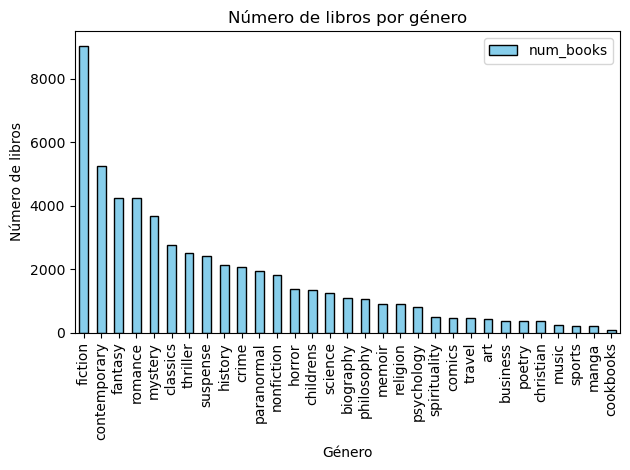

In [25]:

# Graficar los géneros más comunes
plt.figure(figsize=(40,20))
tag_genres_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de libros por género')
plt.xlabel('Género')
plt.ylabel('Número de libros')
plt.tight_layout()
plt.show()

### Libros más añadidos a "To read"

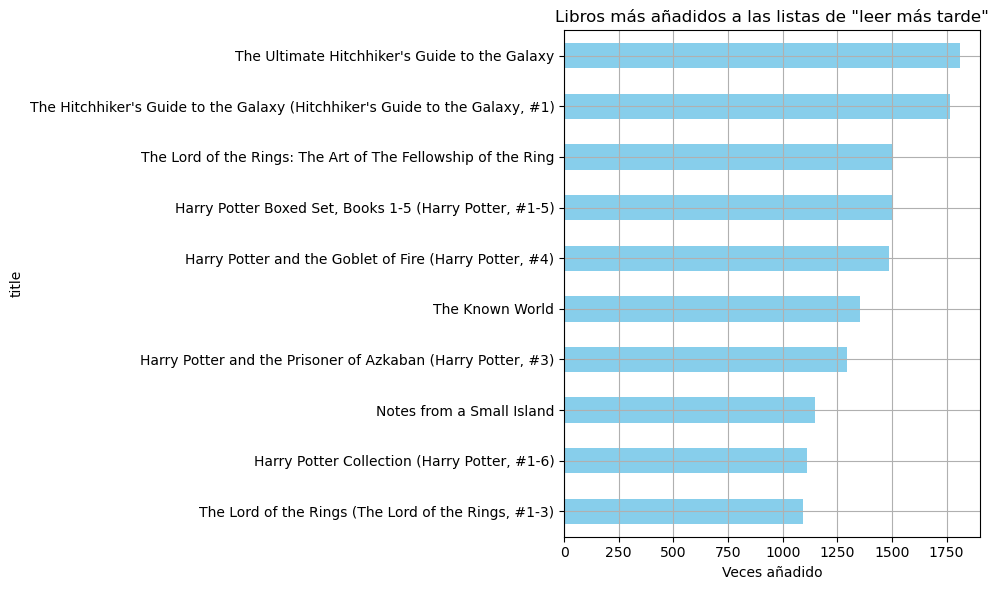

In [26]:
# Unir los libros con los libros en to read
book_to_read = df_to_read.merge(df_books, on='book_id')

# Libros más añadidos a las listas de "leer más tarde"
books_most_added = book_to_read['title'].value_counts().head(10)


# Gráfico de libros más añadidos
plt.figure(figsize=(10,6))
books_most_added.plot(kind='barh', color='skyblue')
plt.title('Libros más añadidos a las listas de "leer más tarde"')
plt.xlabel('Veces añadido')
plt.gca().invert_yaxis()  # Invertir el eje para que el más añadido esté arriba
plt.tight_layout()
plt.grid(True)
plt.show()

### Autores cuyos libros más aparecen en listas "To Read"

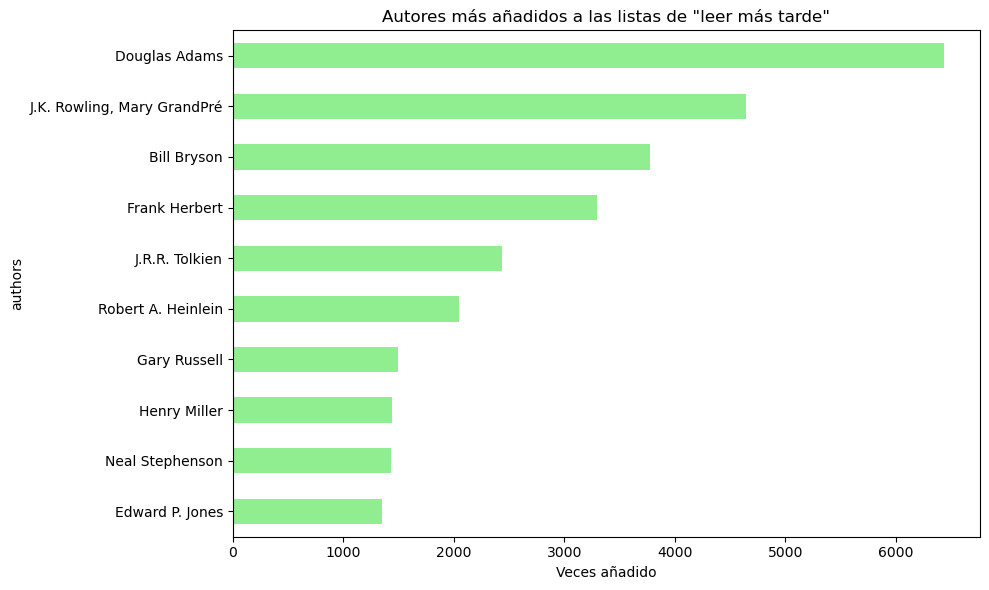

In [27]:
# Autores más añadidos a las listas de "leer más tarde"
authors_most_added = book_to_read['authors'].value_counts().head(10)

# Gráfico de autores más añadidos
plt.figure(figsize=(10,6))
authors_most_added.plot(kind='barh', color='lightgreen')
plt.title('Autores más añadidos a las listas de "leer más tarde"')
plt.xlabel('Veces añadido')
plt.gca().invert_yaxis()  # Invertir el eje para que el más añadido esté arriba
plt.tight_layout()
plt.show()

### Distribución de libros en "To Read" por año de publicación

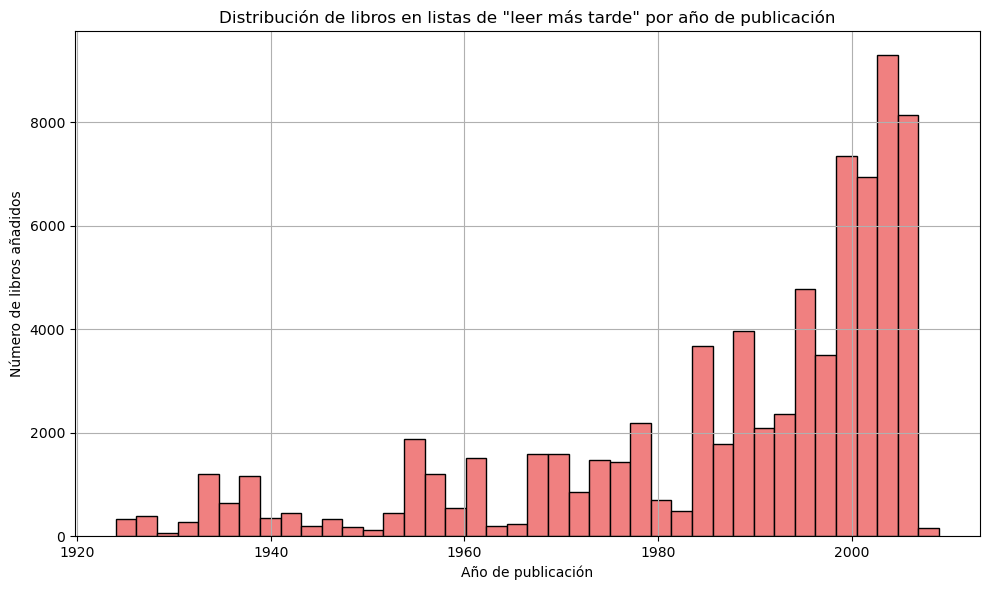

In [28]:
# Filtrar los datos para los últimos 100 años
filtered_last_100_years = book_to_read[book_to_read['original_publication_year'] >= (2024 - 100)]

# Crear el histograma para los últimos 100 años
plt.figure(figsize=(10,6))
plt.hist(filtered_last_100_years['original_publication_year'].dropna().astype(int), bins=40, color='lightcoral', edgecolor='black')
plt.title('Distribución de libros en listas de "leer más tarde" por año de publicación')
plt.xlabel('Año de publicación')
plt.ylabel('Número de libros añadidos')
plt.grid(True)

plt.tight_layout()
plt.show()

### Guardar Datasets Preprocesados
Tras explorar los datasets, ver su información y que características nos pueden interesar a la hora de realizar nuestro sistema de recomendación, procedemos a guardarlos.

In [29]:
subset_books_profile.to_csv('clean_datasets/books.csv', index=False)
df_ratings.to_csv('clean_datasets/ratings.csv', index=False)
df_to_read.to_csv('clean_datasets/to_read.csv', index=False)